In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 3)

# default using seabron style
%matplotlib inline
plt.style.use('seaborn')

## Dataset
Illustrate line plots using stock data using pandas_datareader. Note yahoo finance API is not accurate or reliable, we use it for demonstration ONLY

In [2]:
from pandas_datareader import data, wb
yahoo_reader = data.YahooDailyReader

big_tech = ['GOOG', 'AAPL', 'AMZN', 'MSFT', 'FB']
df = yahoo_reader(big_tech, start='2019-01-01', end='2019-12-31').read()
df.shape
df.columns
# get adjusted close price
df_prices = df.drop('Volume', axis=1, level=0)
df_volume = df['Volume']
df_adjclose = df['Adj Close']

df_adjclose.head()
#data.DataReader("DIG",'yahoo', '2019-11-11', '2019-11-19') 
#data.DataReader("600919.SS",'yahoo', '2019-11-11', '2019-11-19')
#data.YahooDivReader('MORL', start='2019-01-11', end='2019-11-19').read()

(250, 30)

MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['AAPL', 'AMZN', 'FB', 'GOOG', 'MSFT']],
           codes=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Attributes', 'Symbols'])

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2019-01-02,155.582,1539.13,135.68,1045.85,99.647
2019-01-03,140.085,1500.28,131.74,1016.06,95.981
2019-01-04,146.065,1575.39,137.95,1070.71,100.445
2019-01-07,145.740,1629.51,138.05,1068.39,100.573
2019-01-08,148.519,1656.58,142.53,1076.28,101.302


In [3]:
df_ohlc = df_prices.stack(level=0).reset_index(level=1)
df_adjclose.shape, df_ohlc.shape
df_ohlc.head()
df_monthly = df_ohlc.drop(columns='Attributes').resample('1M').ohlc()
df_monthly.head(10)

((250, 5), (1250, 6))

Symbols,Attributes,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,,
2019-01-02,Adj Close,155.582,1539.13,135.68,1045.85,99.647
2019-01-02,Close,157.920,1539.13,135.68,1045.85,101.120
2019-01-02,High,158.850,1553.36,137.51,1052.32,101.750
2019-01-02,Low,154.230,1460.93,128.56,1015.71,98.940
2019-01-02,Open,154.890,1465.20,128.99,1016.57,99.550


Symbols        AAPL                              AMZN                    \
               open    high      low   close     open     high      low   
Date                                                                      
2019-01-31  155.582  169.00  140.085  166.11  1539.13  1736.41  1460.93   
2019-02-28  164.055  175.87  164.055  174.32  1626.23  1673.06  1566.76   
2019-03-31  173.119  197.69  169.500  189.83  1671.73  1823.75  1586.57   
2019-04-30  189.217  208.48  188.380  203.06  1814.19  1956.34  1798.73   
2019-05-31  208.293  215.31  173.885  176.23  1911.52  1964.40  1772.70   
2019-06-30  172.127  201.57  170.270  198.68  1692.69  1935.20  1672.00   
2019-07-31  200.186  221.37  198.410  216.42  1922.19  2035.80  1849.44   
2019-08-31  207.020  218.03  192.032  210.16  1855.32  1897.92  1743.51   
2019-09-30  205.084  226.42  204.220  220.90  1789.84  1853.66  1709.22   
2019-10-31  223.918  249.75  215.130  247.24  1735.65  1798.85  1685.06   

Symbols                  FB                             GOOG           \
              close    open    high     low   close     open     high   
Date                                                                    
2019-01-31  1692.85  135.68  171.68  128.56  165.60  1045.85  1117.33   
2019-02-28  1635.25  165.71  172.47  159.59  162.37  1110.75  1147.00   
2019-03-31  1786.58  162.28  174.30  159.28  166.39  1140.99  1231.79   
2019-04-30  1930.10  168.70  198.48  167.28  194.19  1194.43  1289.27   
2019-05-31  1790.01  193.03  196.18  177.16  180.28  1168.08  1190.85   
2019-06-30  1909.10  164.15  198.88  160.84  190.55  1036.23  1124.11   
2019-07-31  1898.11  193.00  208.66  191.93  196.95  1097.95  1265.55   
2019-08-31  1797.49  192.73  198.47  176.66  186.78  1209.01  1234.11   
2019-09-30  1726.99  182.39  193.10  175.66  177.87  1168.39  1248.30   
2019-10-31  1775.99  175.81  198.09  173.09  196.70  1205.10  1299.31   

Symbols                           MSFT                           
                 low    close     open    high      low   close  
Date                                                             
2019-01-31  1014.070  1103.00   99.647  107.90   95.981  103.80  
2019-02-28  1086.000  1111.30  101.282  113.24  101.282  112.04  
2019-03-31  1123.300  1174.90  111.364  120.82  108.800  118.07  
2019-04-30  1175.000  1185.00  117.787  131.37  117.787  129.81  
2019-05-31  1100.180  1101.29  126.555  130.65  122.072  124.23  
2019-06-30  1025.000  1076.39  119.037  138.40  119.010  134.57  
2019-07-31  1093.703  1223.00  134.771  141.68  134.670  140.33  
2019-08-31  1140.140  1198.50  137.135  140.94  130.780  139.15  
2019-09-30  1163.200  1220.97  135.579  142.37  134.510  138.05  
2019-10-31  1162.430  1261.28  136.605  145.67  133.220  144.90

## Plot individual stock's adjusted close prices
- Matplotlib plot typically take the form plot(x, y) or plot(y). It can also handle Dataframe and Series, automatically choose index as x-axis
- For illustration purpose, let's plot each individual line with different stlye and marker. They can be combined into format string
- Seaborn style automatically chooses different color for each line. So no need to set individual color
- For legend, need to manually set label either in plot() or legend()

### Lines with different styles
linestyle, marker, color, linewidth, label

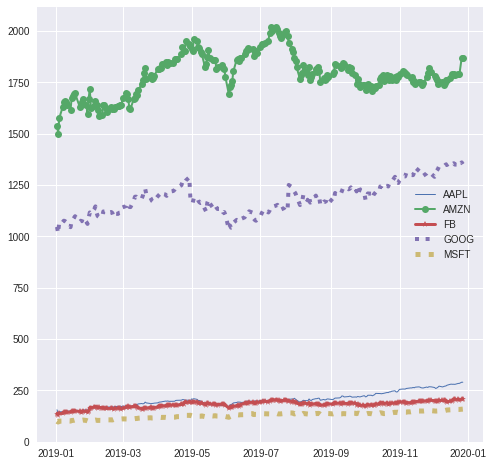

In [4]:
plt.figure(figsize=(8, 8))
# line style and marker can be combined
linestyles = ['-', # solid line  
              '--', # dashed line  
              '-.', # dash dot line  
              ':', # dotted line  
             ]  
markers = ['.', '+', 'o', 's', 'd', '*', '^', 'v', '<', '>', '']
formats = ['-', '-o', '-*', ':', ':+', ':*']
for ind, col in enumerate(df_adjclose.columns):
    # print(formats[ind], col)
    plt.plot(df_adjclose[col], formats[ind], linewidth=ind+1, label=col);
plt.legend(loc='best');

### Use log scale
There is 10 times difference in prices of different stock. Let's try plt with log scale
- use plt.semilogy() to plot
- use plt.yscale('log')
- use ax.set_yscale('log')

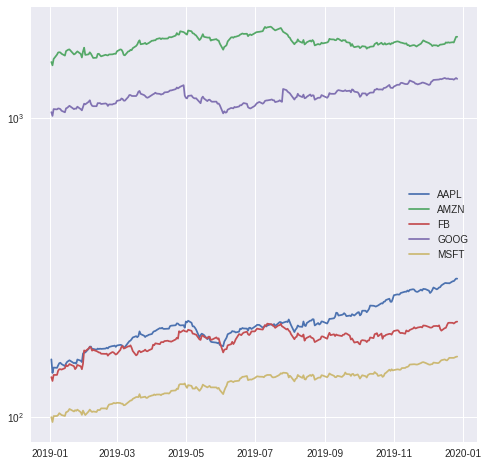

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(df_adjclose);
plt.yscale('log')
plt.legend(df_adjclose.columns, loc='best');

### Use seaborn line plot
Seaborn integrates well with pandas DataFrame. For example
- Automatically plot one curve for each columns
- Default add legend
- sns.lineplot support hue for categorical variables. But less usefull than other plots (barplot...)
- For more customization
 - fig, ax = plt.subplots
 - sns.lineplot(...., ax=ax)
 - ax.set...

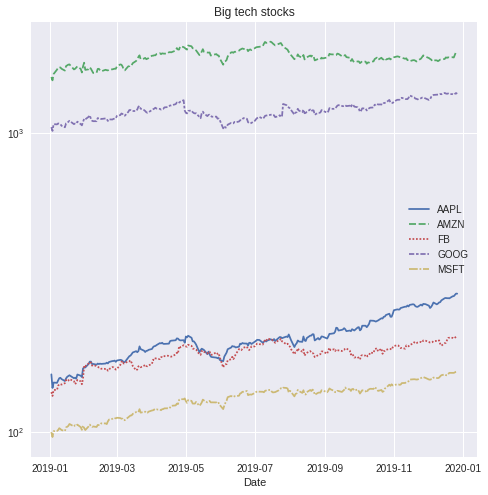

In [6]:
fig, ax = plt.subplots(figsize=(8, 8));
sns.lineplot(data=df_adjclose, ax=ax);
ax.set_title('Big tech stocks')
ax.set_yscale('log');

### Use pandas line plot
For line plots over DataFrame, pandas plot seems most convenient
- pandas can also plot multiple columns, automatically set xlabel and ylabel
- and set figsize, title, grid, legend, xlim, ylim, and subplots
- for additional setting
 - ax = df.plot.line()
 - ax.set_...()

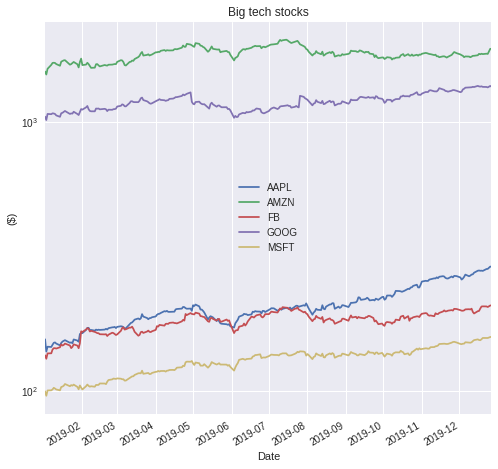

In [7]:
ax = df_adjclose.plot.line(title='Big tech stocks', logy=True, figsize=(8, 8), legend=True);
ax.set_ylabel('($)');
ax.legend(loc='center');

## Plot montly price ranges
- seaborn plot, seaborn is much simple
- matplotlib fill between
- although technically a candlestcik chart is more common for stock price range

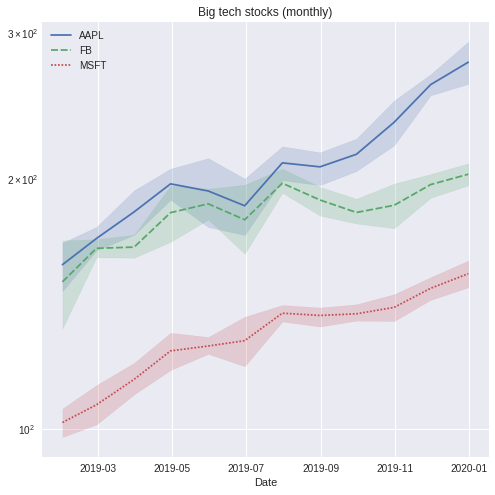

In [8]:
# df_monthly_range = df_monthly.stack(level=1).reset_index(level=1).drop(columns='level_1')
fig, ax = plt.subplots(figsize=(8, 8));
sns.lineplot(data=df_monthly.drop(['AMZN', 'GOOG'], axis=1), ax=ax)
ax.set_title('Big tech stocks (monthly)')
ax.set_yscale('log');

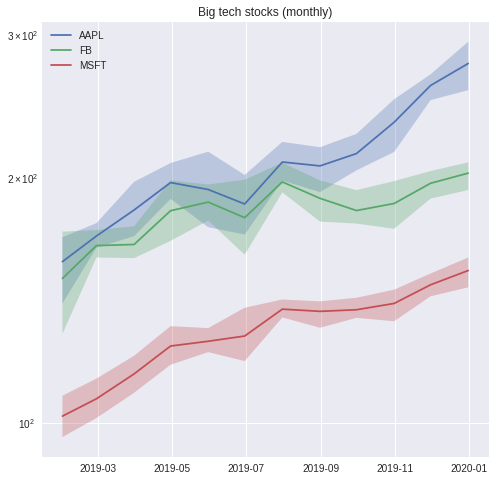

In [9]:
plt.figure(figsize=(8, 8))
for symbol in df_monthly.columns.levels[0]:
    if symbol not in ['AMZN', 'GOOG']:
        df_symbol = df_monthly[symbol]
        plt.fill_between(df_symbol.index, df_symbol['high'], df_symbol['low'], alpha=0.3);
        plt.semilogy(df_symbol.mean(axis=1), label=symbol);
plt.title('Big tech stocks (monthly)')
plt.legend(loc='best');

## Overlay plot
- add volume, for illlustration only. Volume better plot with barchar

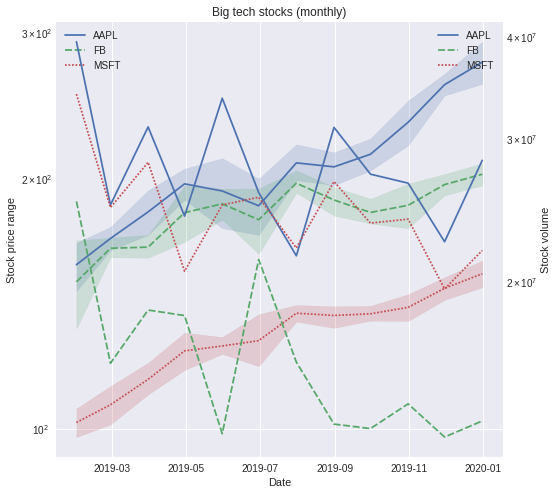

In [10]:
df_volume_monthly = df_volume.resample('1M').mean()
fig, ax = plt.subplots(figsize=(8, 8));
sns.lineplot(data=df_monthly.drop(['AMZN', 'GOOG'], axis=1), ax=ax)
ax.set_title('Big tech stocks (monthly)')
ax.set_ylabel('Stock price range')
ax.set_yscale('log');

#fig, ax = plt.subplots(figsize=(8, 8))
ax2 = ax.twinx()
sns.lineplot(data=df_volume_monthly.drop(['AMZN', 'GOOG'], axis=1), ax=ax2)
#df_volume_monthly.drop(['AMZN', 'GOOG'], axis=1).plot.line(ax=ax2)
ax2.set_ylabel('Stock volume')
ax2.set_yscale('log');

## Monthly percentage change

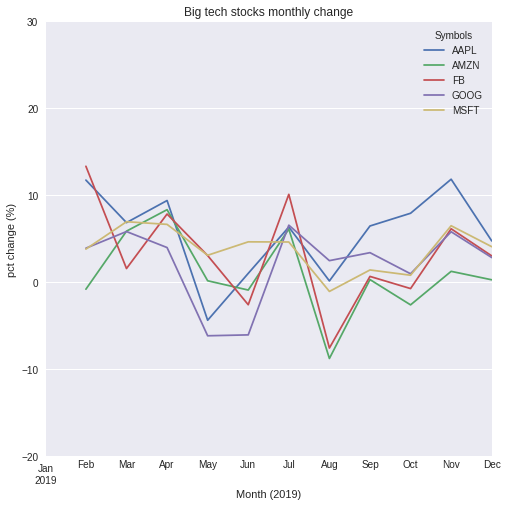

In [11]:
df_adjclose_monthly = df_adjclose.resample('1M').mean()
df_pct_change = df_adjclose_monthly.pct_change() * 100
ax = df_pct_change.plot.line(figsize=(8, 8))
ax.set_xlabel('Month (2019)')
ax.set_ylabel('pct change (%)')
ax.set_ylim([-20, 30])
ax.grid('both')
ax.set_title('Big tech stocks monthly change');